In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, precision_recall_curve,
                             average_precision_score, roc_curve)
from imblearn.ensemble import EasyEnsembleClassifier
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

In [2]:
df = pd.read_csv('creditcard.csv')

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
# Split features (X) and target (y)
X = df.drop(['Time', 'Amount', 'Class'], axis=1)  # Remove irrelevant columns
y = df['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (284807, 30)
Target shape: (284807,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [29]:
stratified_kfold = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

param_grid = {
    'n_estimators': [5, 10, 20, 30],
    'sampling_strategy': [0.01, 0.05, 0.1 ]
}

base_model = EasyEnsembleClassifier(
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 20, 'sampling_strategy': 0.01}
Best cross-validation F1 score: 0.7378


In [30]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_sampling_strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058087,0.003545,0.000000,0.000000,5,0.0001,"{'n_estimators': 5, 'sampling_strategy': 0.0001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
1,0.064330,0.006566,0.000000,0.000000,5,0.0010,"{'n_estimators': 5, 'sampling_strategy': 0.001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
2,45.076888,0.179629,0.910234,0.134639,5,0.0100,"{'n_estimators': 5, 'sampling_strategy': 0.01}",0.771084,0.717949,0.694118,0.795322,0.691358,0.733966,0.041958,3
3,5.761108,0.045739,0.616837,0.055814,5,0.0500,"{'n_estimators': 5, 'sampling_strategy': 0.05}",0.666667,0.563636,0.512195,0.600858,0.604651,0.589602,0.050908,8
4,3.019540,0.084659,0.653902,0.051438,5,0.1000,"{'n_estimators': 5, 'sampling_strategy': 0.1}",0.599119,0.473118,0.398754,0.433437,0.453608,0.471607,0.068338,12
5,0.161420,0.069637,0.000000,0.000000,10,0.0001,"{'n_estimators': 10, 'sampling_strategy': 0.0001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
6,0.234595,0.136046,0.000000,0.000000,10,0.0010,"{'n_estimators': 10, 'sampling_strategy': 0.001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
7,58.765065,9.024744,1.339699,0.068868,10,0.0100,"{'n_estimators': 10, 'sampling_strategy': 0.01}",0.771084,0.713376,0.690058,0.781065,0.713376,0.733792,0.035698,4
8,8.861727,1.310146,1.022142,0.090624,10,0.0500,"{'n_estimators': 10, 'sampling_strategy': 0.05}",0.676768,0.580645,0.512195,0.608696,0.631068,0.601874,0.054774,7
9,5.131342,0.219950,1.031848,0.079243,10,0.1000,"{'n_estimators': 10, 'sampling_strategy': 0.1}",0.558704,0.488889,0.420712,0.450161,0.457338,0.475161,0.047064,9


In [31]:
results_df = cv_results[
    ['param_n_estimators', 'param_sampling_strategy', 'mean_test_score', 'std_test_score']
].dropna()
results_df

,param_n_estimators,param_sampling_strategy,mean_test_score,std_test_score
2,5,0.01,0.733966,0.041958
3,5,0.05,0.589602,0.050908
4,5,0.10,0.471607,0.068338
7,10,0.01,0.733792,0.035698
8,10,0.05,0.601874,0.054774
9,10,0.10,0.475161,0.047064
12,20,0.01,0.737761,0.035001
13,20,0.05,0.602634,0.046364
14,20,0.10,0.475137,0.041022
17,30,0.01,0.735117,0.032990


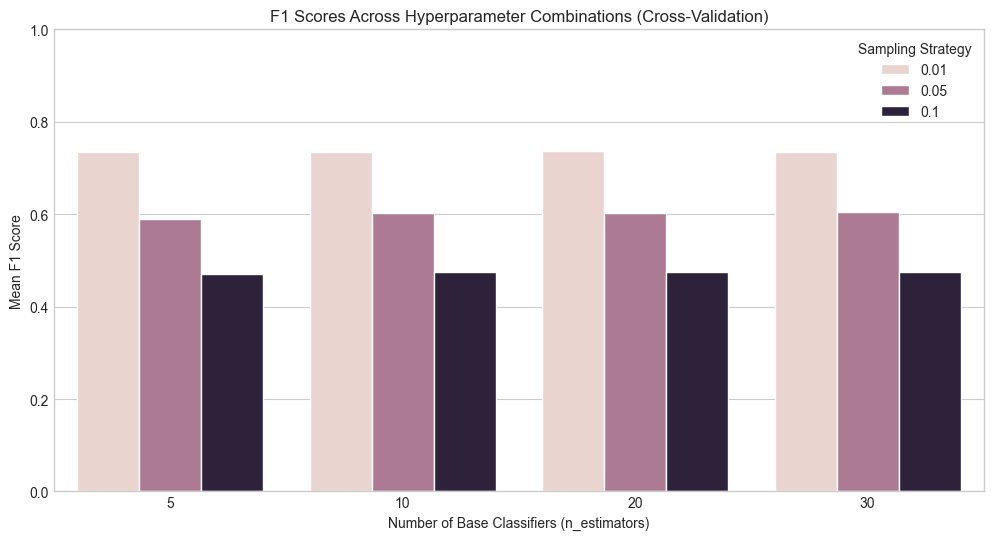

In [32]:

plt.figure(figsize=(12, 6))
sns.barplot(
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_sampling_strategy',
    hue_order=results_df['param_sampling_strategy'].unique(),  # 显式指定hue的顺序
    data=results_df,
    capsize=0.1
)
plt.title('F1 Scores Across Hyperparameter Combinations (Cross-Validation)')
plt.xlabel('Number of Base Classifiers (n_estimators)')
plt.ylabel('Mean F1 Score')
plt.ylim(0, 1)
plt.legend(title='Sampling Strategy')
plt.show()

In [33]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for fraud class

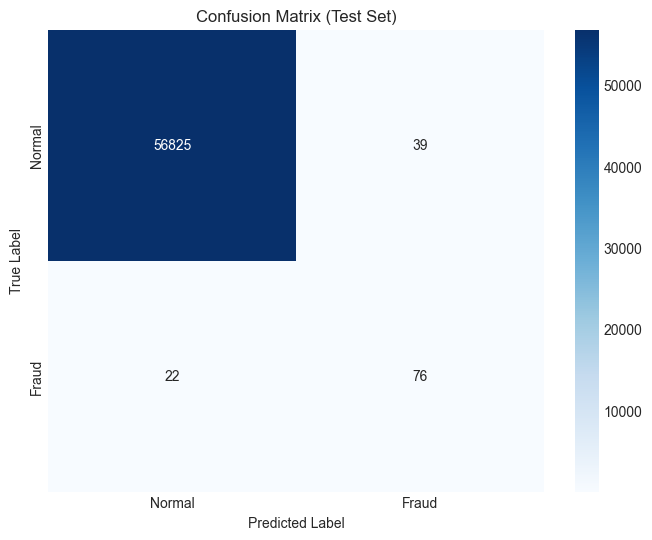

In [34]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',  # Show numbers as integers
    cmap='Blues',
    xticklabels=['Normal', 'Fraud'],
    yticklabels=['Normal', 'Fraud']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

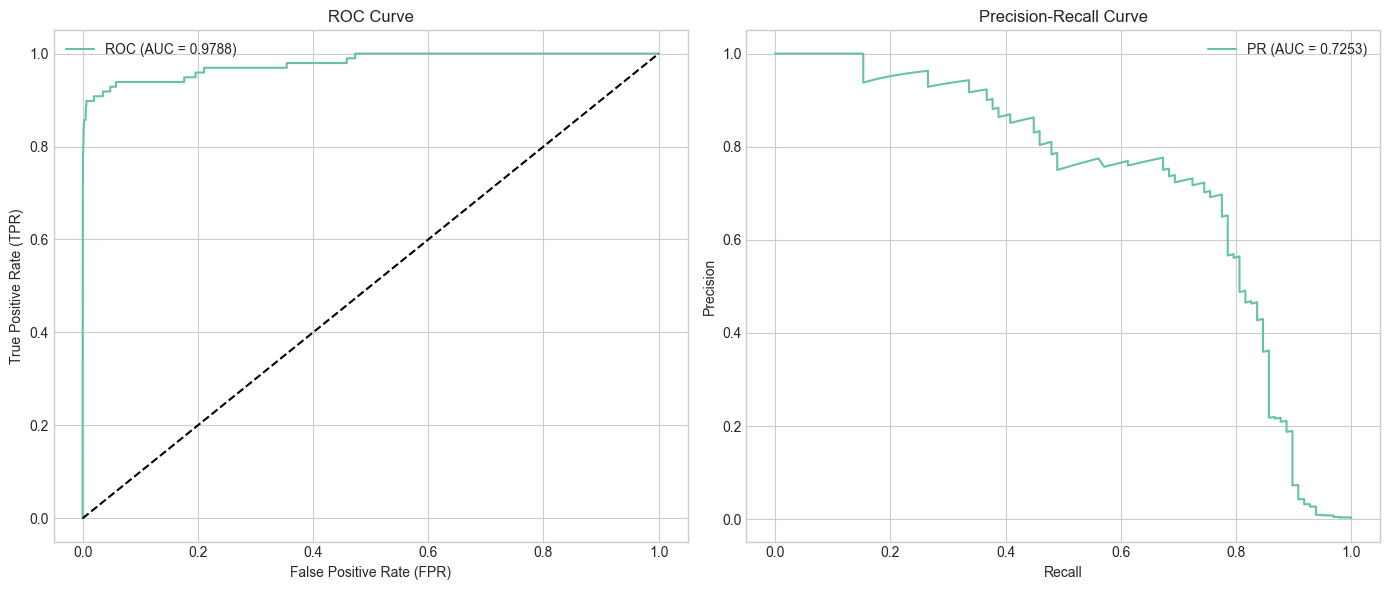

In [35]:
# Plot ROC Curve and Precision-Recall Curve side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve (good for balanced data, but still useful)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
ax1.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], 'k--')  # Random guess line
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('ROC Curve')
ax1.legend()

# Precision-Recall Curve (better for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
ax2.plot(recall, precision, label=f'PR (AUC = {pr_auc:.4f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend()

plt.tight_layout()
plt.show()

In [36]:
# Extract confusion matrix components
tn, fp, fn, tp = cm.ravel()

# Calculate key metrics
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("=== Key Fraud Detection Metrics ===")
print(f"Recall: {recall:.4f} - % of actual frauds correctly detected")
print(f"Precision: {precision:.4f} - % of predicted frauds that are real")
print(f"F1 Score: {f1:.4f} - Balance between precision and recall")
print(f"ROC-AUC: {roc_auc:.4f} - Overall class separation ability")
print(f"PR-AUC: {pr_auc:.4f} - Performance on fraud class (critical for imbalance)")

=== Key Fraud Detection Metrics ===
Recall: 0.7755 - % of actual frauds correctly detected
Precision: 0.6609 - % of predicted frauds that are real
F1 Score: 0.7136 - Balance between precision and recall
ROC-AUC: 0.9788 - Overall class separation ability
PR-AUC: 0.7253 - Performance on fraud class (critical for imbalance)
